# IBA PROJECT 
# Titanic: Machine Learning from Disaster
##### Sec B:
##### Ajay Kumar Routh - 18BM60004
##### Ankita Singh - 18BM60012
##### Sec A:
##### Rajarshi Mondal - 18BM60089
##### Alok Datta - 18BM60009

## Executive Summary

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, it is asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
In this competition, two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`. Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”. The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. We are predicting these outcomes. Using the patterns found in the train.csv data, it will be predicted that whether the other 418 passengers on board (found in test.csv) survived.

## Data Overview

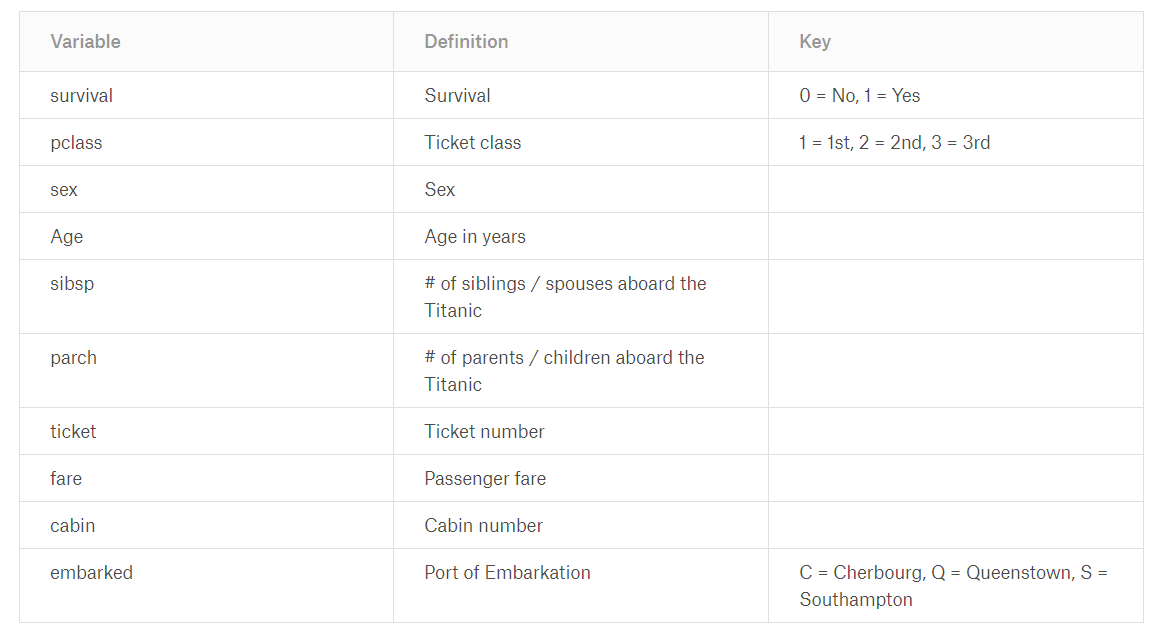

## Problem Statement
### *Predict if a passenger survived the sinking of the Titanic or not.*

## 1. Libraries, Reading Data & Summary of the Data

#### 1.1. Importing Packages

In [9]:
library(dplyr) # Data Manipulation
library(ggplot2) # Visualization
library(scales) # Visualization
install.packages("caTools")
library(caTools) # Prediction: Splitting Data
install.packages("e1071")
library(e1071) # Prediction: SVM, Naive Bayes, Parameter Tuning
library(rpart) # Prediction: Decision Tree
install.packages("rpart.plot")
library(rpart.plot) # Prediction: Decision Tree
library(randomForest) # Prediction: Random Forest
library(caret) # Prediction: k-Fold Cross Validation

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: lattice


In [10]:
install.packages("car")
library(car)

also installing the dependencies ‘pbkrtest’, ‘lme4’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



#### 1.2. Reading data files form Github Repository

In [162]:
train = read.csv("https://raw.githubusercontent.com/ajay13461/IBA-Project-/master/train.csv",na.strings = c("","NA","Na","na"))
test1 = read.csv("https://raw.githubusercontent.com/ajay13461/IBA-Project-/master/test.csv",na.strings = c("","NA","Na","na"))
sub = read.csv("https://raw.githubusercontent.com/ajay13461/IBA-Project-/master/gender_submission.csv",na.strings = c("","NA","Na","na"))

#### 1.3. Merging test & gender_submission

In [163]:
test = merge(test1, sub, by = "PassengerId")

#### 1.4. Checking Structure & Summary (this will also help to find out the missing values)

In [164]:
print('Structure of train data')
str(train)
print('Summary of train data')
summary(train)

print('Structure of test data')
str(test)
print('Summary of test data')
summary(test)

[1] "Structure of train data"
'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 147 levels "A10","A14","A16",..: NA 82 NA 56 NA NA 130 NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
[1] "Summary of train data"


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

[1] "Structure of test data"
'data.frame':	418 obs. of  12 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : Factor w/ 418 levels "Abbott, Master. Eugene Joseph",..: 210 409 273 414 182 370 85 58 5 104 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : Factor w/ 363 levels "110469","110489",..: 153 222 74 148 139 262 159 85 101 270 ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : Factor w/ 76 levels "A11","A18","A21",..: NA NA NA NA NA NA NA NA NA NA ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 $ Survived   : int  0 1 0 0 1 0 1 0 1 0 ...
[1] "Summary of test data"


  PassengerId         Pclass     
 Min.   : 892.0   Min.   :1.000  
 1st Qu.: 996.2   1st Qu.:1.000  
 Median :1100.5   Median :3.000  
 Mean   :1100.5   Mean   :2.266  
 3rd Qu.:1204.8   3rd Qu.:3.000  
 Max.   :1309.0   Max.   :3.000  
                                 
                                        Name         Sex           Age       
 Abbott, Master. Eugene Joseph            :  1   female:152   Min.   : 0.17  
 Abelseth, Miss. Karen Marie              :  1   male  :266   1st Qu.:21.00  
 Abelseth, Mr. Olaus Jorgensen            :  1                Median :27.00  
 Abrahamsson, Mr. Abraham August Johannes :  1                Mean   :30.27  
 Abrahim, Mrs. Joseph (Sophie Halaut Easu):  1                3rd Qu.:39.00  
 Aks, Master. Philip Frank                :  1                Max.   :76.00  
 (Other)                                  :412                NA's   :86     
     SibSp            Parch             Ticket         Fare        
 Min.   :0.0000   Min.   :0.0000   P

## 2. Feature Engineering

#### 2.1. Missing Value Impustation

In [165]:
df = rbind(train,test)
train$Age[is.na(train$Age)]= mean(df$Age,na.rm=T)
test$Age[is.na(test$Age)]= mean(df$Age,na.rm=T)
train = subset(train, !is.na(Embarked))
test$Fare[is.na(test$Fare)] = mean(df$Fare,na.rm=T)

#### 2.2. Title Feature extraction

In [166]:
names_train <- train$Name
title_train <-  gsub("^.*, (.*?)\\..*$", "\\1", names_train)
train$title <- title_train
table(train$title)
names_test <- test$Name
title_test <-  gsub("^.*, (.*?)\\..*$", "\\1", names_test)
test$title <- title_test
table(test$title)
train$title[train$title == 'Mlle'] <- 'Miss' 
train$title[train$title == 'Ms'] <- 'Miss' 
train$title[train$title == 'Mme'] <- 'Mrs' 
train$title[train$title == 'Lady'] <- 'Miss'
train$title[train$title == 'Dona'] <- 'Miss' 
train$title[train$title == 'Capt'] <- 'Officer' 
train$title[train$title == 'Col'] <- 'Officer' 
train$title[train$title == 'Major'] <- 'Officer' 
train$title[train$title == 'Dr'] <- 'Officer' 
train$title[train$title == 'Rev'] <- 'Officer' 
train$title[train$title == 'Don'] <- 'Officer' 
train$title[train$title == 'Sir'] <- 'Officer' 
train$title[train$title == 'the Countess'] <- 'Officer' 
train$title[train$title == 'Jonkheer'] <- 'Officer'
test$title[test$title == 'Mlle'] <- 'Miss' 
test$title[test$title == 'Ms'] <- 'Miss' 
test$title[test$title == 'Mme'] <- 'Mrs' 
test$title[test$title == 'Lady'] <- 'Miss'
test$title[test$title == 'Dona'] <- 'Miss' 
test$title[test$title == 'Capt'] <- 'Officer' 
test$title[test$title == 'Col'] <- 'Officer' 
test$title[test$title == 'Major'] <- 'Officer' 
test$title[test$title == 'Dr'] <- 'Officer' 
test$title[test$title == 'Rev'] <- 'Officer' 
test$title[test$title == 'Don'] <- 'Officer' 
test$title[test$title == 'Sir'] <- 'Officer' 
test$title[test$title == 'the Countess'] <- 'Officer' 
test$title[test$title == 'Jonkheer'] <- 'Officer'


        Capt          Col          Don           Dr     Jonkheer         Lady 
           1            2            1            7            1            1 
       Major       Master         Miss         Mlle          Mme           Mr 
           2           40          181            2            1          517 
         Mrs           Ms          Rev          Sir the Countess 
         124            1            6            1            1 


   Col   Dona     Dr Master   Miss     Mr    Mrs     Ms    Rev 
     2      1      1     21     78    240     72      1      2 

#### 2.3. Removal of Redundant Columns or Variables

In [167]:
train$Cabin = NULL
test$Cabin = NULL
train$PassengerId = NULL
test$PassengerId = NULL
train$Ticket = NULL
test$Ticket = NULL
train$Name = NULL
test$Name = NULL

#### 2.4. Conversion of variables into proper variable type

In [168]:
cols1=c("Survived","Pclass", "title")
for (i in cols1){
  train[,i]=as.factor(train[,i])
}
cols2=c("Survived","Pclass", "title")
for (i in cols2){
  test[,i]=as.factor(test[,i])
}

#### 2.5. Preparing and keeping data in the proper format

In [169]:
train = train[c("Pclass","Sex","Embarked","title","Age","SibSp","Parch","Fare","Survived")]
test = test[c("Pclass","Sex","Embarked","title","Age","SibSp","Parch","Fare","Survived")]

#### 2.6. Summary of Cleaned Data

In [170]:
print('Structure of train data')
str(train)
print('Summary of train data')
summary(train)

print('Structure of test data')
str(test)
print('Summary of test data')
summary(test)

[1] "Structure of train data"
'data.frame':	889 obs. of  9 variables:
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 1 3 1 3 3 1 3 3 2 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 3 1 3 3 3 2 3 3 3 1 ...
 $ title   : Factor w/ 5 levels "Master","Miss",..: 3 4 2 4 3 3 3 1 4 4 ...
 $ Age     : num  22 38 26 35 35 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
[1] "Summary of train data"


 Pclass      Sex      Embarked     title          Age            SibSp       
 1:214   female:312   C:168    Master : 40   Min.   : 0.42   Min.   :0.0000  
 2:184   male  :577   Q: 77    Miss   :185   1st Qu.:22.00   1st Qu.:0.0000  
 3:491                S:644    Mr     :517   Median :29.88   Median :0.0000  
                               Mrs    :125   Mean   :29.69   Mean   :0.5242  
                               Officer: 22   3rd Qu.:35.00   3rd Qu.:1.0000  
                                             Max.   :80.00   Max.   :8.0000  
     Parch             Fare         Survived
 Min.   :0.0000   Min.   :  0.000   0:549   
 1st Qu.:0.0000   1st Qu.:  7.896   1:340   
 Median :0.0000   Median : 14.454           
 Mean   :0.3825   Mean   : 32.097           
 3rd Qu.:0.0000   3rd Qu.: 31.000           
 Max.   :6.0000   Max.   :512.329           

[1] "Structure of test data"
'data.frame':	418 obs. of  9 variables:
 $ Pclass  : Factor w/ 3 levels "1","2","3": 3 3 2 3 3 3 3 2 3 3 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 2 1 2 ...
 $ Embarked: Factor w/ 3 levels "C","Q","S": 2 3 2 3 3 3 2 3 1 3 ...
 $ title   : Factor w/ 5 levels "Master","Miss",..: 3 4 3 3 4 3 2 3 4 3 ...
 $ Age     : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp   : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch   : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Fare    : num  7.83 7 9.69 8.66 12.29 ...
 $ Survived: Factor w/ 2 levels "0","1": 1 2 1 1 2 1 2 1 2 1 ...
[1] "Summary of test data"


 Pclass      Sex      Embarked     title          Age            SibSp       
 1:107   female:152   C:102    Master : 21   Min.   : 0.17   Min.   :0.0000  
 2: 93   male  :266   Q: 46    Miss   : 80   1st Qu.:23.00   1st Qu.:0.0000  
 3:218                S:270    Mr     :240   Median :29.88   Median :0.0000  
                               Mrs    : 72   Mean   :30.19   Mean   :0.4474  
                               Officer:  5   3rd Qu.:35.75   3rd Qu.:1.0000  
                                             Max.   :76.00   Max.   :8.0000  
     Parch             Fare         Survived
 Min.   :0.0000   Min.   :  0.000   0:266   
 1st Qu.:0.0000   1st Qu.:  7.896   1:152   
 Median :0.0000   Median : 14.454           
 Mean   :0.3923   Mean   : 35.622           
 3rd Qu.:0.0000   3rd Qu.: 31.500           
 Max.   :9.0000   Max.   :512.329           

## 3. Exploratory Data Analysis

#### 3.1. Correlation of numeric features

In [171]:
cor(train[,unlist(lapply(train,is.numeric))])

,Age,SibSp,Parch,Fare
Age,1.00000000,-0.2317661,-0.1789268,0.08804277
SibSp,-0.23176605,1.0000000,0.4145416,0.16088685
Parch,-0.17892681,0.4145416,1.0000000,0.21753204
Fare,0.08804277,0.1608869,0.2175320,1.00000000


##### *Multicolinearity among continuous variable doesn't exist*

#### 3.2. Independence amongs categorical variables using Chi-square test

In [172]:
ps = chisq.test(train$Pclass, train$Sex)$p.value
pe = chisq.test(train$Pclass, train$Embarked)$p.value
pt = chisq.test(train$Pclass, train$title)$p.value
se = chisq.test(train$Sex, train$Embarked)$p.value
st = chisq.test(train$Sex, train$title)$p.value
et = chisq.test(train$Embarked, train$title)$p.value
cormatrix = matrix(c(0, ps, pe, pt,
                     ps, 0, se, st,
                     pe, se, 0, et,
                     pt, st, et, 0), 
                   4, 4, byrow = TRUE)
row.names(cormatrix) = colnames(cormatrix) = c("Pclass", "Sex", "Embarked", "title")
cormatrix

Warning message in chisq.test(train$Pclass, train$title):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(train$Embarked, train$title):
“Chi-squared approximation may be incorrect”

,Pclass,Sex,Embarked,title
Pclass,0.000000e+00,3.127092e-04,8.435268e-26,8.768759e-12
Sex,3.127092e-04,0.000000e+00,1.258525e-03,2.159268e-189
Embarked,8.435268e-26,1.258525e-03,0.000000e+00,7.302116e-06
title,8.768759e-12,2.159268e-189,7.302116e-06,0.000000e+00


##### *All the p values are <0.5 hence all categorical variables are independent of each other.*
##### *So there is very less likelyhood of multicolinearity*

## 4. Modelling

#### 4.1. Logistic Regression Model

##### 4.1.1. Fitting Logistic Regression Model

In [173]:
log.reg = glm(Survived ~ ., family = binomial(link='logit'), data = train)
summary(log.reg)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3457  -0.5623  -0.3844   0.5387   2.5499  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   19.455430 618.855862   0.031  0.97492    
Pclass2       -1.040829   0.321363  -3.239  0.00120 ** 
Pclass3       -2.120000   0.316178  -6.705 2.01e-11 ***
Sexmale      -15.143958 618.855556  -0.024  0.98048    
EmbarkedQ     -0.092891   0.394510  -0.235  0.81385    
EmbarkedS     -0.439747   0.250029  -1.759  0.07861 .  
titleMiss    -15.705950 618.855745  -0.025  0.97975    
titleMr       -3.544586   0.537699  -6.592 4.34e-11 ***
titleMrs     -14.973227 618.855797  -0.024  0.98070    
titleOfficer  -3.584052   0.779902  -4.596 4.32e-06 ***
Age           -0.025147   0.009120  -2.758  0.00582 ** 
SibSp         -0.547191   0.126096  -4.339 1.43e-05 ***
Parch         -0.352741   0.134209  -2.628  0.00858 **

##### *Variable 'Sex' has very low significance though before dropping let us check VIF*

In [174]:
vif(log.reg)

,GVIF,Df,GVIF^(1/(2*Df))
Pclass,2.190520e+00,2,1.216569
Sex,1.045534e+07,1,3233.471507
Embarked,1.307728e+00,2,1.069373
title,2.359172e+07,4,8.348240
Age,1.726607e+00,1,1.314004
SibSp,1.610913e+00,1,1.269217
Parch,1.464281e+00,1,1.210075
Fare,1.619694e+00,1,1.272672


##### *Variable 'Sex' has very hih GVIF score = 3233.471. So it is casing multicolinearity with title. We will drop the variable 'Sex'.*

##### 4.1.2. Logistic regeression after dropping variable 'Sex':

In [175]:
log.reg2 = glm(Survived ~ .-Sex, family = binomial(link='logit'), data = train)
summary(log.reg2)


Call:
glm(formula = Survived ~ . - Sex, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3603  -0.5636  -0.3857   0.5507   2.5592  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.327860   0.635746   6.808 9.93e-12 ***
Pclass2      -1.075168   0.320128  -3.359 0.000783 ***
Pclass3      -2.136253   0.315901  -6.762 1.36e-11 ***
EmbarkedQ    -0.077458   0.394012  -0.197 0.844149    
EmbarkedS    -0.408043   0.249427  -1.636 0.101856    
titleMiss    -0.569656   0.500158  -1.139 0.254724    
titleMr      -3.557451   0.538471  -6.607 3.93e-11 ***
titleMrs      0.170037   0.552818   0.308 0.758400    
titleOfficer -3.284862   0.740674  -4.435 9.21e-06 ***
Age          -0.025594   0.009093  -2.815 0.004881 ** 
SibSp        -0.555209   0.126241  -4.398 1.09e-05 ***
Parch        -0.354912   0.134249  -2.644 0.008201 ** 
Fare          0.003543   0.002654   1.335 0.181874    
---
Si

##### *Variables Embarked & Fare has p value greater than significance level 0.05. Hence we removed these two variables also*

##### 4.1.3. Logistic regression after dropping variables 'Sex', 'Embarked' & 'Fare':

In [176]:
log.reg3 = glm(Survived ~ .-Sex -Embarked -Fare, family = binomial(link='logit'), data = train)
summary(log.reg3)


Call:
glm(formula = Survived ~ . - Sex - Embarked - Fare, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3420  -0.5683  -0.3914   0.5496   2.6626  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.338875   0.592287   7.326 2.38e-13 ***
Pclass2      -1.391437   0.284059  -4.898 9.66e-07 ***
Pclass3      -2.413987   0.257719  -9.367  < 2e-16 ***
titleMiss    -0.491781   0.492400  -0.999  0.31792    
titleMr      -3.547582   0.529594  -6.699 2.10e-11 ***
titleMrs      0.188142   0.544813   0.345  0.72984    
titleOfficer -3.303152   0.736677  -4.484 7.33e-06 ***
Age          -0.026709   0.008933  -2.990  0.00279 ** 
SibSp        -0.547328   0.122476  -4.469 7.86e-06 ***
Parch        -0.318033   0.129044  -2.465  0.01372 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1182.82 

##### *Now the resulted summary is looking appropriate and we will go ahead with validation*

##### 4.1.4. Validation of multicolinearity:

In [193]:
vif(log.reg3) # VIF score for checking multicolinearity

,GVIF,Df,GVIF^(1/(2*Df))
Pclass,1.428174,2,1.093189
title,2.536052,4,1.123362
Age,1.694772,1,1.301834
SibSp,1.569997,1,1.252995
Parch,1.393406,1,1.180426


##### *All the vif values are below close to 1 which is desirable.*
##### *All the continuous variables are significant.*

##### 4.1.5. Evaluation Scores of Logistic Regression:

In [178]:
prob_pred_test = predict(log.reg3, type = 'response', newdata = test[-9])
y_pred_test = ifelse(prob_pred_test > 0.5, 1, 0)
cm_test=table(test$Survived,y_pred_test)
error = mean(test$Survived != y_pred_test) # Misclassification error
paste('Accuracy on Test data',round(1-error,4))
ls = round(1-error,4)

[1] "Accuracy on Test data 0.9402"

#### 4.2. Decision Tree

##### 4.2.1. Fitting Decision Tree Classification Model

In [179]:
set.seed(123)
classifier = rpart(Survived ~ ., data = train, method = 'class')

##### 4.2.2. Evaluation of Decision Treen

In [180]:
y_pred = predict(classifier, newdata = test[,-which(names(test)=="Survived")], type='class')
table(test$Survived, y_pred) # Confusion matrix
error = mean(test$Survived != y_pred) # Misclassification error
paste('Accuracy on Test data',round(1-error,4))
ds = round(1-error,4)

   y_pred
      0   1
  0 250  16
  1  12 140

[1] "Accuracy on Test data 0.933"

##### *Accuracy of a single tree is 0.933. Overfitting can easily occur in Decision Tree classification. We can idenfity that evaluating the model using k-Fold Cross Validation. Or we might be able to improve the model. Let's do 10-fold cross validation to find out whether we could improve the model.*

#### 4.3. Decision Tree Model with K-fold cross validation

##### 4.3.1. Fitting Decision Tree Model with K-fold cross validation

In [181]:
set.seed(123)
folds = createMultiFolds(train$Survived, k = 10, times = 5)
control <- trainControl(method = "repeatedcv", index = folds)
classifier_cv <- train(Survived ~ ., data = train, method = "rpart", trControl = control)

##### 4.3.2. Evaluation of Decision Treen with 10-fold Cross Validation

In [182]:
y_pred = predict(classifier_cv, newdata = test[,-which(names(test)=="Survived")])
table(test$Survived, y_pred) # Confusion matrix
error <- mean(test$Survived != y_pred) # Misclassification error
paste('Accuracy on Test data',round(1-error,4))
ds_cv = round(1-error,4)

   y_pred
      0   1
  0 245  21
  1   6 146

[1] "Accuracy on Test data 0.9354"

##### We were able to improve the model after 10-fold cross validation. 
##### The accuracy has been improved to 0.9354

#### 4.4. Random Forest

##### 4.4.1. Fitting Random Forest Model

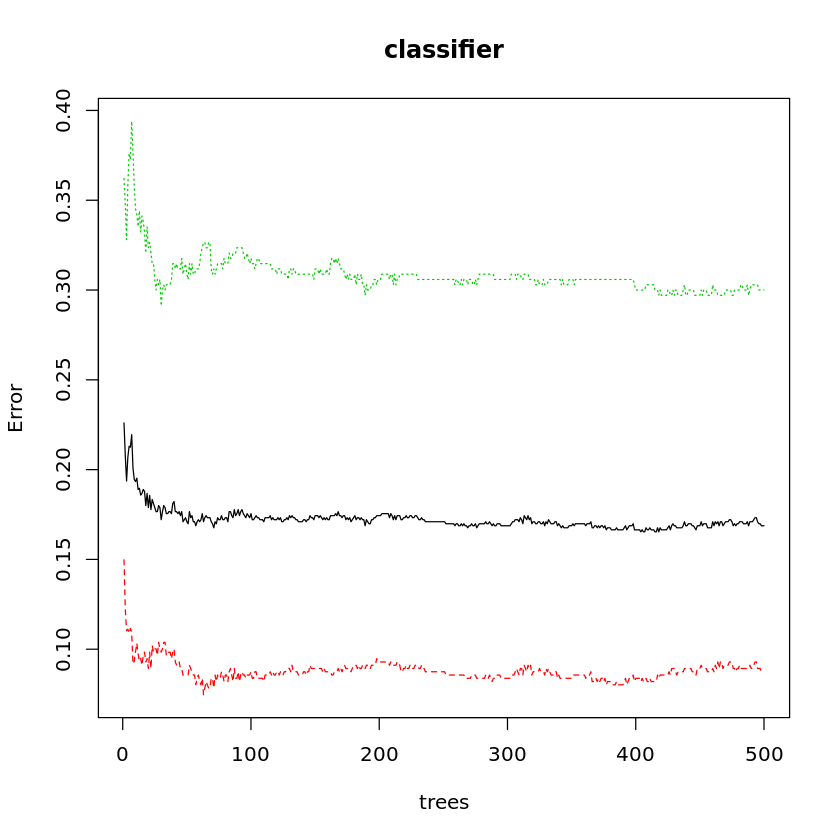

In [183]:
set.seed(123)
classifier = randomForest(Survived ~ ., data = train)
plot(classifier)

The green, black and red lines represent error rate for death, overall and survival, respectively. The overall error rate converges to around 17%. 
Interestingly, our model predicts death better than survival. 
Since the overall error rate converges to a constant and does not seem to further decrease, our choice of default 500 trees in the randomForest function is a good choice.

In [184]:
set.seed(123)
classifier = randomForest(Survived ~ ., data = train, ntree = 500)

##### 4.4.2. Evaluation Score of Random Forest

In [185]:
y_pred = predict(classifier, newdata = test[,-which(names(test)=="Survived")], type='class')
table(test$Survived, y_pred) # Confusion matrix
error = mean(test$Survived != y_pred) # Misclassification error
paste('Accuracy on Test data',round(1-error,4))
rf = round(1-error,4)

   y_pred
      0   1
  0 248  18
  1  26 126

[1] "Accuracy on Test data 0.8947"

#### 4.5. Random Forest with k fold cross validation

##### 4.5.1. Fitting Random Forest Model with 10 folds

In [188]:
set.seed(123)
folds = createMultiFolds(train$Survived, k = 10) #10 folds
control <- trainControl(method = "repeatedcv", index = folds)
classifier_cv <- train(Survived ~ ., data = train, method = "rf", trControl = control)

##### 4.5.2. Evaluation of Random Forest with 10-fold Cross Validation

In [189]:
y_pred = predict(classifier_cv, newdata = test[,-which(names(test)=="Survived")])
table(test$Survived, y_pred) # Confusion matrix
error <- mean(test$Survived != y_pred) # Misclassification error
paste('Accuracy on Test data',round(1-error,4))
rf_cv = round(1-error,4)

   y_pred
      0   1
  0 239  27
  1  35 117

[1] "Accuracy on Test data 0.8517"

## 5. Accuracy Report of all 5 algorithms

In [190]:
Accuracy = c(ls,ds,ds_cv,rf,rf_cv)
Accuracy_Percentage = Accuracy*100
Model = c('Logistic Regression', 'Decistion Tree', 'Decistion Tree: 10-fold cross validation', 'Random Forest','Random Forest: 10-fold cross validation')
Report = cbind(Model, Accuracy_Percentage)
Report

Model,Accuracy_Percentage
Logistic Regression,94.02
Decistion Tree,93.3
Decistion Tree: 10-fold cross validation,93.54
Random Forest,89.47
Random Forest: 10-fold cross validation,85.17


### *From above report it is evident that Logistic regression has best accuracy. Hence we will do the prediction by using Logistic Regression*